In [ ]:
<center><h2>Discrete Wavelet Transform</h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    
<p>
Discrete Wavelet Transform, Daubechies type (efficient, but not obvious)

In [1]:
# DWT.py:  Discrete Wavelet Transform, Daubechies type

from IPython.display import IFrame
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook

In [2]:
sq3 = sqrt(3)
fsq2 = 4.0*sqrt(2)
N = 1024                           # N = 2^n 
c0 = (1+sq3)/fsq2
c1 = (3+sq3)/fsq2                  # Daubechies 4 coefficents
c2 = (3-sq3)/fsq2
c3 = (1-sq3)/fsq2
f = zeros( (N + 1), float) 
inxi = 1.0/N                                 # for chirp signal
xi = 0.0

def chirp(xi):               # chirp signal
    y = sin(60.0*xi**2);
    return y;
                   
for i in range(1, N + 1):
    f[i] = chirp(xi)                         # Function to TF
    xi  += inxi;  

In [3]:
def daube4(f, n, sign):             # DWT if sign >= 0, inverse if sign < 0
    global tr,yl,xl,xh,yh
    tr = zeros( (n + 1), float)       
    yl = zeros( (N + 1), float)        # for low pass filter
    xl = zeros( (N + 1), float) 
    yh = zeros( (N + 1), float)        # for high pass filter
    xh = zeros( (N + 1), float) 
    if n < 4 : return
    mp = int(n/2)                    # midpoint of array
    mp1 = mp + 1                     
    if sign >= 0:                   # DWT
        j = 1
        i = 1
        maxx  = n/2
        while j <= n - 3:
            tr[i] = c0*f[j] + c1*f[j+1] + c2*f[j+2] + c3*f[j+3] # low-pass 
            xl[i]=i
            yl[i]=tr[i]
            tr[i+mp] = c3*f[j] - c2*f[j+1] + c1*f[j+2] - c0*f[j+3]  # high-pass
            xh[i+mp]=i+mp
            yh[i+mp]=tr[i+mp]
            i += 1                                  # d coefficents
            j += 2                                  # downsampling
        tr[i] = c0*f[n-1] + c1*f[n] + c2*f[1] + c3*f[2] # low-pass filter
        tr[i+mp] = c3*f[n-1] - c2*f[n] + c1*f[1] - c0*f[2] # high-pass filter
    else:                                               # inverse DWT
        tr[1] = c2*f[mp] + c1*f[n] + c0*f[1] + c3*f[mp1] # low- pass filter
        tr[2] = c3*f[mp] - c0*f[n] + c1*f[1] - c2*f[mp1]# high-pass filter
        j = 3
        for i in range (1, mp):
            tr[j] = c2*f[i] + c1*f[i+mp] + c0*f[i+1] + c3*f[i+mp1]         # low- pass
            j += 1                                                          # upsample
            tr[j] = c3*f[i] - c0*f[i+mp] + c1*f[i+1] - c2*f[i+mp1]         # high-pass
            j += 1;                                     # upsampling
    for i in range(1, n+1):
        f[i] = tr[i]       

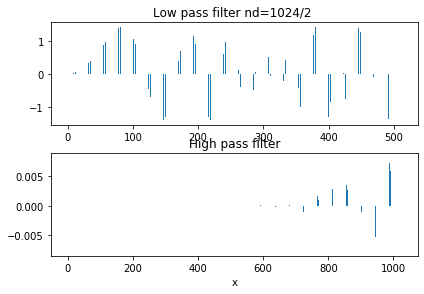

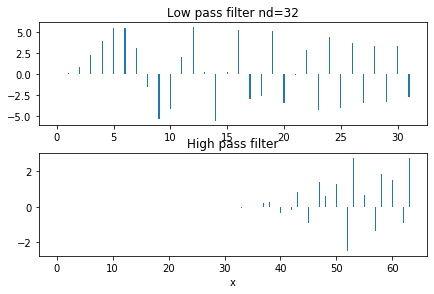

In [ ]:
def pyram(f, n, sign):                       # DWT, replaces f by TF
    if (n < 4): return                       # too few data
    nend = 4                                 # indicates when to stop
    if sign >= 0 :                           # Transform
        nd = n
        while nd >= nend:                    # Downsample filtering 
            daube4(f, nd, sign)
            nd //= 2  
            if nd == 512:
                fig = plt.figure()
                ax1 = fig.add_subplot(2,1,1) 
                ax1.bar(xl,yl,0.1)
                plt.title('Low pass filter nd=1024/2 ')
                ax2=fig.add_subplot(2,1,2) 
                ax2.bar(xh,yh,0.1)
                plt.tight_layout()
                plt.xlabel('x')
                plt.title('High pass filter')
            if nd == 32:
                fig1 = plt.figure()
                ax3 = fig1.add_subplot(2,1,1) 
                ax3.bar(xl,yl,0.1)
                plt.title('Low pass filter nd=32')
                ax4=fig1.add_subplot(2,1,2) 
                ax4.bar(xh,yh,0.1)
                plt.tight_layout()
                plt.xlabel('x')
                plt.title('High pass filter')
            if nd == 8:
                fig2 = plt.figure()
                ax5 = fig2.add_subplot(2,1,1) 
                ax5.bar(xl,yl,0.1)
                plt.title('Low pass filter nd=8 ')
                ax6=fig2.add_subplot(2,1,2) 
                ax6.bar(xh,yh,0.1)
                plt.tight_layout()
                plt.xlabel('x')
                plt.title('High pass filter')     
    else:     # Inverse TF
        nd = 4
        while nd<=n+1: # Upsampling
            daube4(f , nd, sign)    
            nd=2*nd
n = 1024                                        # must be 2^m
pyram(f, n, 1)# TF 
n=N
pyram(f, n,  - 1)                          # Inverse TF
figa=plt.figure()
axa=figa.add_subplot(111)
xs=arange(0,1024)
plt.plot(xs[:1000],f[:1000])
plt.show()